In [1]:
# # This code allows to output more than one variable value without using a print statement.
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# # Default
# # InteractiveShell.ast_node_interactivity = "last_expr"

In [2]:
# Version Check
import sys
import tensorflow as tf
import tensorflow_datasets as tfds
import PIL
import pandas as pd
import numpy as np
import scipy
print("python", sys.version)
print("tensorflow", tf.__version__)
print("tensorflow-datasets", tfds.__version__)
print("Pillow", PIL.__version__)
print("pandas", pd.__version__)
print("numpy", np.__version__)
print("scipy", scipy.__version__)
print()
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("Built with GPU support:", tf.test.is_built_with_gpu_support())

python 3.8.0 (default, Nov  6 2019, 16:00:02) [MSC v.1916 64 bit (AMD64)]
tensorflow 2.6.2
tensorflow-datasets 4.4.0
Pillow 8.3.2
pandas 1.3.3
numpy 1.19.5
scipy 1.7.1

Num GPUs Available: 1
Built with CUDA: True
Built with GPU support: True


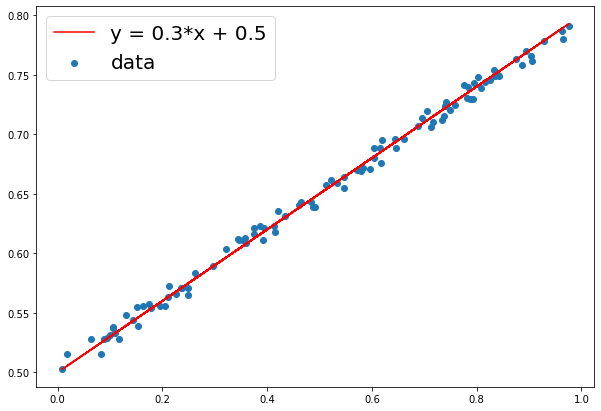

w: 0.3, b: 0.5


In [3]:
import matplotlib.pyplot as plt

# generate a sample dataset
def make_linear(w=0.3, b=0.5, size=100, noise=0.01):
    
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f"y = {w}*x + {b}")
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f"w: {w}, b: {b}")
    return x, yy

x, y = make_linear()

In [4]:
num_epoch = 100
learning_rate = 0.005
error_threshold = 0.005
errors = []

# randomly reset w, b 
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    
    # hypothesis
    y_hat = w * x + b
    
    # loss function
    error = 0.5 * ((y_hat - y)**2).sum()
    
    if error < error_threshold:
        break
    
    # gradient
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print("{0:3} | w = {1:.5f},   b = {2:.5f},   error = {3:.5f}".format(epoch, w, b, error))
    
print("-----" * 12)
print("{0:3} | w = {1:.5f},   b = {2:.5f},   error = {3:.5f}".format(epoch, w, b, error))

  0 | w = 0.49544,   b = 0.23899,   error = 9.32030
  5 | w = 0.52309,   b = 0.37974,   error = 0.21302
 10 | w = 0.49169,   b = 0.39753,   error = 0.15807
 15 | w = 0.46428,   b = 0.41217,   error = 0.11760
 20 | w = 0.44068,   b = 0.42477,   error = 0.08759
 25 | w = 0.42035,   b = 0.43562,   error = 0.06533
 30 | w = 0.40284,   b = 0.44497,   error = 0.04882
 35 | w = 0.38777,   b = 0.45302,   error = 0.03658
 40 | w = 0.37478,   b = 0.45995,   error = 0.02750
 45 | w = 0.36360,   b = 0.46592,   error = 0.02076
 50 | w = 0.35397,   b = 0.47107,   error = 0.01577
 55 | w = 0.34568,   b = 0.47549,   error = 0.01206
 60 | w = 0.33854,   b = 0.47931,   error = 0.00932
 65 | w = 0.33238,   b = 0.48259,   error = 0.00728
 70 | w = 0.32709,   b = 0.48542,   error = 0.00577
------------------------------------------------------------
 74 | w = 0.32427,   b = 0.48692,   error = 0.00485


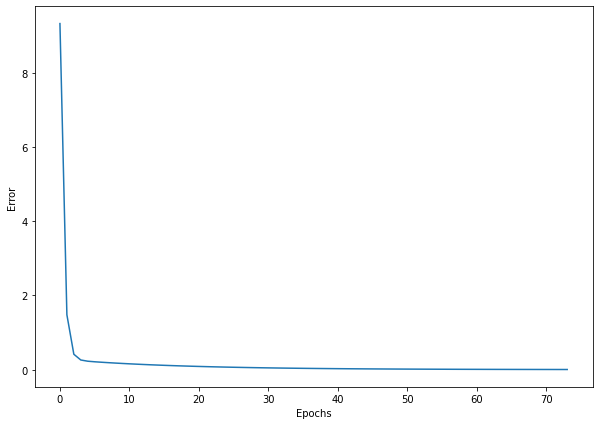

In [5]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()